## **Chapter 20: KMeans**

### **Exercise 1: Random data**


In [1]:
x <- floor(runif(100, min=1, max=101))
y <- floor(runif(100, min=1, max=101))
print(x[1:10])
print(y[1:10])

 [1] 80 80 28 44 60 15 47 20 10 28
 [1] 93 20 66 97 59 76 90 24 18 51


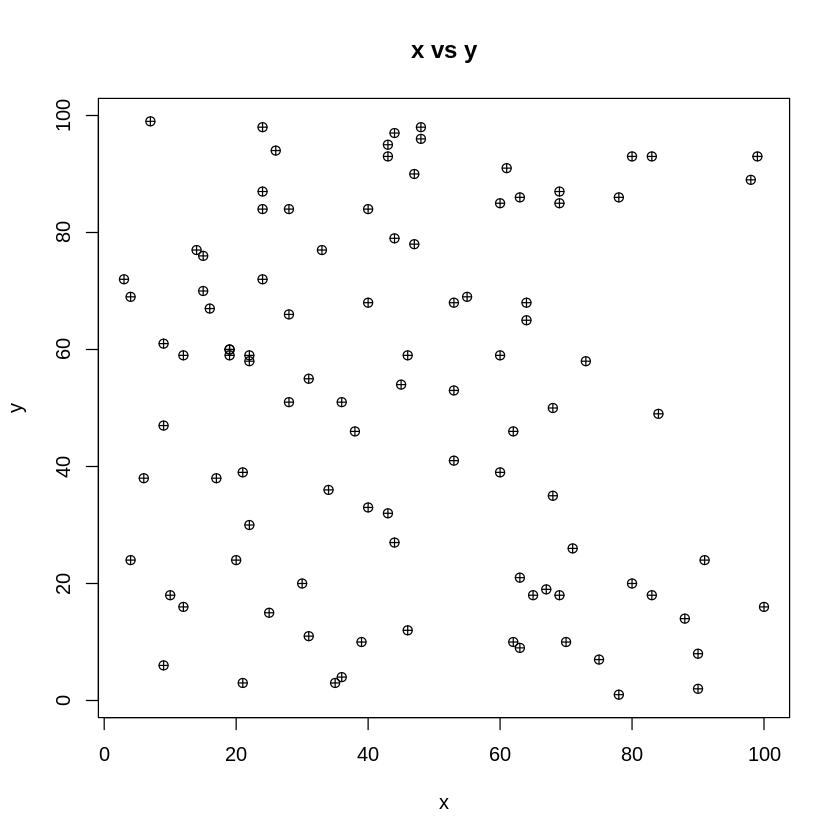

In [2]:
# Plot the chart 
plot(x = x,y = y,
    xlab = "x",
    ylab = "y",
    main = "x vs y", 
    pch = 10
)

In [3]:
# Determine number of clusters
mydata<-data.frame(x = x, y = y)

print(head(mydata))
wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))

for (i in 1:10) wss[i] <- sum(kmeans(mydata, 
                                centers=i)$withinss)


   x  y
1 80 93
2 80 20
3 28 66
4 44 97
5 60 59
6 15 76


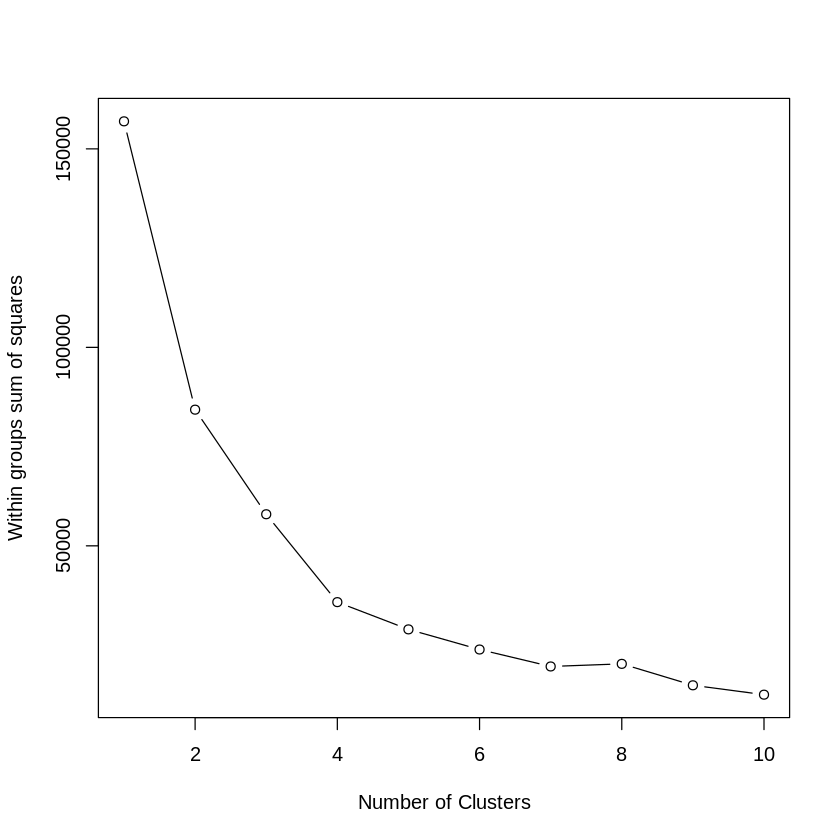

In [4]:
plot(1:10, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")


In [5]:
# clustering
set.seed(20)
dataCluster <- kmeans(mydata, centers = 4, nstart = 20)
print(dataCluster)


K-means clustering with 4 clusters of sizes 26, 22, 23, 29

Cluster means:
         x        y
1 61.00000 82.23077
2 26.50000 22.04545
3 73.91304 21.78261
4 22.13793 68.72414

Clustering vector:
  [1] 1 3 4 1 1 4 1 2 2 4 4 2 4 2 2 4 2 4 4 1 1 1 3 4 1 2 4 1 4 4 3 1 2 3 2 2 3
 [38] 1 4 4 4 1 2 1 4 2 2 4 3 1 2 3 4 2 1 1 3 4 1 1 1 3 4 3 3 2 4 4 1 3 4 4 2 2
 [75] 4 4 3 1 1 3 3 2 4 2 3 2 3 4 3 4 3 1 3 3 2 1 1 3 1 3

Within cluster sum of squares by cluster:
[1] 11226.615  7274.455  8133.739  9187.241
 (between_SS / total_SS =  77.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [6]:
print("Centroid points:")
print(dataCluster$centers)

[1] "Centroid points:"
         x        y
1 61.00000 82.23077
2 26.50000 22.04545
3 73.91304 21.78261
4 22.13793 68.72414


In [8]:
# Plot the chart 
x <- c(80, 50, 70)
y <- c(30, 45, 75)
data_new <- data.frame(x = x, y = y)

clusters <- function(x, centers) {
    # compute squared euclidean distance from each sample to each cluster center
    tmp <- sapply(seq_len(nrow(x)),
    function(i) apply(centers, 1,
    function(v) sum((x[i, ]-v)^2)))
    max.col(-t(tmp)) # find index of min distance
}

new <- clusters(data_new, dataCluster[["centers"]])
new 


[1] 3 2 1

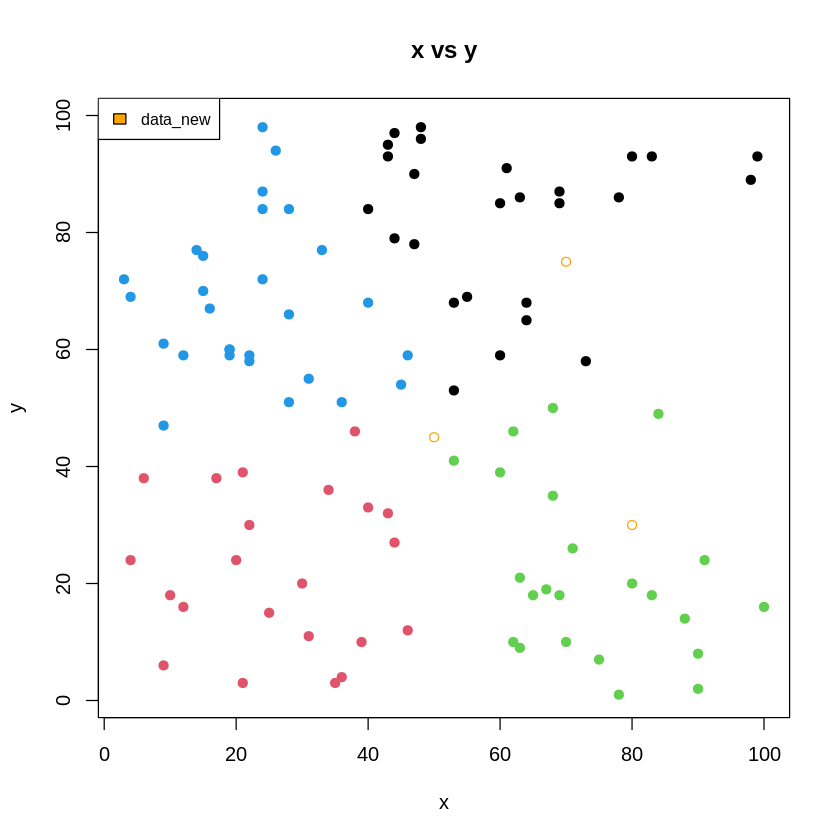

In [9]:
dataCluster$cluster <- as.factor(dataCluster$cluster)

plot(x = mydata$x, y = mydata$y,
    xlab = "x",
    ylab = "y",
    main = "x vs y", col = dataCluster$cluster,
    pch = 19
)

lines(x, y, col='orange', type='p')
legend("topleft", c("data_new"), cex=0.8, fill = c("orange"))


In [11]:
install.packages('factoextra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [12]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



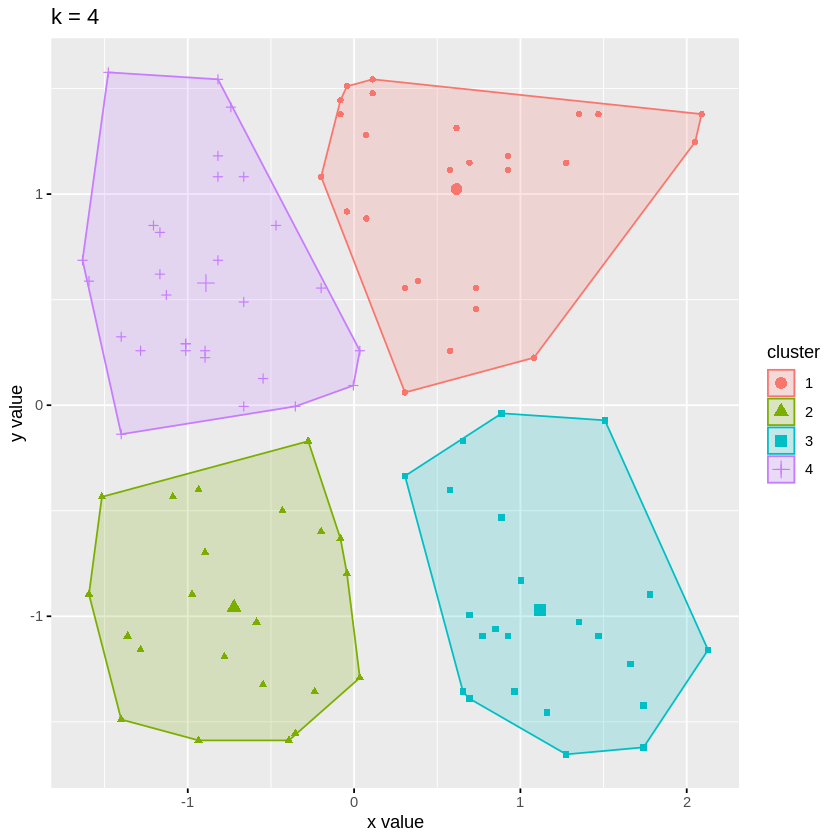

In [13]:
fviz_cluster(dataCluster, geom = "point", data = mydata) +
ggtitle("k = 4")